<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/miky_generalYelpUsersSentiment_byGroup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [38]:
import warnings
import numpy as np
# Prendo i dati che mi servono di tutti i ristoranti

asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'
feminine = res['gender'] == 'feminine'
masculine = res['gender'] == 'masculine'

# elimino dal dataframe le righe che non sono state riconosciute e presentano questa scritta
res = res[((res.age != 'Not recognized'))]

# sopprimo il Future Warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)

under30 = res['age'] < 30
over30 = res['age'] > 30
under40 = res['age'] < 40
over40 = res['age'] > 40
under55 = res['age'] < 55
over55 = res['age'] > 55


# ALL RESTAURANTS

# ETNIA E ETA'

totAmericanUsers_under30 = len(res[((black_american) | (white_american)) & (under30)])  # american users under 30
print(totAmericanUsers_under30)
totAmericanUsers_over30_and_under40 = len(res[((black_american) | (white_american)) & (over30) & (under40)])  # american users between 30 and 40
totAmericanUsers_over40_and_under55 = len(res[((black_american) | (white_american)) & (over40) & (under55)])  # american users between 40 and 55
totAmericanUsers_over55 = len(res[((black_american) | (white_american)) & (over55)])  # american users over 55

totAsianUsers_under30 = len(res[(asian) & (under30)])   # asian users under 30
totAsianUsers_over30_and_under40 = len(res[(asian) & (over30) & (under40)])  # asian users between 30 and 40
totAsianUsers_over40_and_under55 = len(res[(asian) & (over40) & (under55)])  # asian users between 40 and 55
totAsianUsers_over55 = len(res[(asian) & (over55)])  # asian users over 55

totMexicanUsers_under30 = len(res[(mexican) & (under30)])   # mexican users under 30
totMexicanUsers_over30_and_under40 = len(res[(mexican) & (over30) & (under40)])  # mexican users between 30 and 40
totMexicanUsers_over40_and_under55 = len(res[(mexican) & (over40) & (under55)])  # mexican users between 40 and 55
totMexicanUsers_over55 = len(res[(mexican) & (over55)])  # mexican users over 55

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_under30_positive = ((len(res[((black_american) & (positive) & (under30)) | ((white_american) & (positive) & (under30))])) * 100) / totAmericanUsers_under30
american_over30_and_under40_positive = ((len(res[((black_american) & (positive) & (over30) & (under40)) | ((white_american) & (positive) & (over30)& (under40))])) * 100) / totAmericanUsers_over30_and_under40
american_over40_and_under55_positive = ((len(res[((black_american) & (positive) & (over40) & (under55)) | ((white_american) & (positive) & (over40)& (under55))])) * 100) / totAmericanUsers_over40_and_under55
american_over55_positive = ((len(res[((black_american) & (positive) & (over55)) | ((white_american) & (positive) & (over55))])) * 100) / totAmericanUsers_over55

asian_under30_positive = (len(res[(asian) & (positive) & (under30)]) * 100) / totAsianUsers_under30
asian_over30_and_under40_positive = (len(res[(asian) & (positive) & (over30) & (under40)]) * 100) / totAsianUsers_over30_and_under40
asian_over40_and_under55_positive = (len(res[(asian) & (positive) & (over40) & (under55)]) * 100) / totAsianUsers_over40_and_under55
asian_over55_positive = (len(res[(asian) & (positive) & (over55)]) * 100) / totAsianUsers_over55

mexican_under30_positive = (len(res[(mexican) & (positive) & (under30)]) * 100) / totMexicanUsers_under30
mexican_over30_and_under40_positive = (len(res[(mexican) & (positive) & (over30) & (under40)]) * 100) / totMexicanUsers_over30_and_under40
mexican_over40_and_under55_positive = (len(res[(mexican) & (positive) & (over40) & (under55)]) * 100) / totMexicanUsers_over40_and_under55
mexican_over55_positive = (len(res[(mexican) & (positive) & (over55)]) * 100) / totMexicanUsers_over55


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_under30_negative = ((len(res[((black_american) & (negative) & (under30)) | ((white_american) & (negative) & (under30))])) * 100) / totAmericanUsers_under30
american_over30_and_under40_negative = ((len(res[((black_american) & (negative) & (over30) & (under40)) | ((white_american) & (negative) & (over30)& (under40))])) * 100) / totAmericanUsers_over30_and_under40
american_over40_and_under55_negative = ((len(res[((black_american) & (negative) & (over40) & (under55)) | ((white_american) & (negative) & (over40)& (under55))])) * 100) / totAmericanUsers_over40_and_under55
american_over55_negative = ((len(res[((black_american) & (negative) & (over55)) | ((white_american) & (negative) & (over55))])) * 100) / totAmericanUsers_over55

asian_under30_negative = (len(res[(asian) & (negative) & (under30)]) * 100) / totAsianUsers_under30
asian_over30_and_under40_negative = (len(res[(asian) & (negative) & (over30) & (under40)]) * 100) / totAsianUsers_over30_and_under40
asian_over40_and_under55_negative = (len(res[(asian) & (negative) & (over40) & (under55)]) * 100) / totAsianUsers_over40_and_under55
asian_over55_negative = (len(res[(asian) & (negative) & (over55)]) * 100) / totAsianUsers_over55

mexican_under30_negative = (len(res[(mexican) & (negative) & (under30)]) * 100) / totMexicanUsers_under30
mexican_over30_and_under40_negative = (len(res[(mexican) & (negative) & (over30) & (under40)]) * 100) / totMexicanUsers_over30_and_under40
mexican_over40_and_under55_negative = (len(res[(mexican) & (negative) & (over40) & (under55)]) * 100) / totMexicanUsers_over40_and_under55
mexican_over55_negative = (len(res[(mexican) & (negative) & (over55)]) * 100) / totMexicanUsers_over55

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
american_under30_neutral = ((len(res[((black_american) & (neutral) & (under30)) | ((white_american) & (neutral) & (under30))])) * 100) / totAmericanUsers_under30
american_over30_and_under40_neutral = ((len(res[((black_american) & (neutral) & (over30) & (under40)) | ((white_american) & (neutral) & (over30)& (under40))])) * 100) / totAmericanUsers_over30_and_under40
american_over40_and_under55_neutral = ((len(res[((black_american) & (neutral) & (over40) & (under55)) | ((white_american) & (neutral) & (over40)& (under55))])) * 100) / totAmericanUsers_over40_and_under55
american_over55_neutral = ((len(res[((black_american) & (neutral) & (over55)) | ((white_american) & (neutral) & (over55))])) * 100) / totAmericanUsers_over55

asian_under30_neutral = (len(res[(asian) & (neutral) & (under30)]) * 100) / totAsianUsers_under30
asian_over30_and_under40_neutral = (len(res[(asian) & (neutral) & (over30) & (under40)]) * 100) / totAsianUsers_over30_and_under40
asian_over40_and_under55_neutral = (len(res[(asian) & (neutral) & (over40) & (under55)]) * 100) / totAsianUsers_over40_and_under55
asian_over55_neutral = (len(res[(asian) & (neutral) & (over55)]) * 100) / totAsianUsers_over55

mexican_under30_neutral = (len(res[(mexican) & (neutral) & (under30)]) * 100) / totMexicanUsers_under30
mexican_over30_and_under40_neutral = (len(res[(mexican) & (neutral) & (over30) & (under40)]) * 100) / totMexicanUsers_over30_and_under40
mexican_over40_and_under55_neutral = (len(res[(mexican) & (neutral) & (over40) & (under55)]) * 100) / totMexicanUsers_over40_and_under55
mexican_over55_neutral = (len(res[(mexican) & (neutral) & (over55)]) * 100) / totMexicanUsers_over55


#------------------------------------------------------------------------------------------------------------------------------------------------------------


# ETNIA E GENERE
# Percentuali di opinione di un GENERE in generale su yelp, in base al numero effettivo di utenti dello stesso genere

totAmericanUsers_feminine = len(res[((black_american) | (white_american)) & (feminine)])
totAmericanUsers_masculine = len(res[((black_american) | (white_american)) & (masculine)])
totAsianUsers_feminine = len(res[(asian) & (feminine)])
totAsianUsers_masculine = len(res[(asian) & (masculine)])
totMexicanUsers_feminine = len(res[(mexican) & (feminine)])
totMexicanUsers_masculine = len(res[(mexican) & (masculine)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_women_positive = ((len(res[((black_american) & (positive) & (feminine)) | ((white_american) & (positive) & (feminine))])) * 100) / totAmericanUsers_feminine
american_men_positive = ((len(res[((black_american) & (positive) & (masculine)) | ((white_american) & (positive) & (masculine))])) * 100) / totAmericanUsers_masculine

asian_women_positive = (len(res[(asian) & (positive) & (feminine)]) * 100) / totAsianUsers_feminine
asian_men_positive = (len(res[(asian) & (positive) & (masculine)]) * 100) / totAsianUsers_masculine

mexican_women_positive = (len(res[(mexican) & (positive) & (feminine)]) * 100) / totMexicanUsers_feminine
mexican_men_positive = (len(res[(mexican) & (positive) & (masculine)]) * 100) / totMexicanUsers_masculine

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
american_women_negative = ((len(res[((black_american) & (negative) & (feminine)) | ((white_american) & (negative) & (feminine))])) * 100) / totAmericanUsers_feminine
american_men_negative = ((len(res[((black_american) & (negative) & (masculine)) | ((white_american) & (negative) & (masculine))])) * 100) / totAmericanUsers_masculine

asian_women_negative = (len(res[(asian) & (negative) & (feminine)]) * 100) / totAsianUsers_feminine
asian_men_negative = (len(res[(asian) & (negative) & (masculine)]) * 100) / totAsianUsers_masculine

mexican_women_negative = (len(res[(mexican) & (negative) & (feminine)]) * 100) / totMexicanUsers_feminine
mexican_men_negative = (len(res[(mexican) & (negative) & (masculine)]) * 100) / totMexicanUsers_masculine

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
american_women_neutral = ((len(res[((black_american) & (neutral) & (feminine)) | ((white_american) & (neutral) & (feminine))])) * 100) / totAmericanUsers_feminine
american_men_neutral = ((len(res[((black_american) & (neutral) & (masculine)) | ((white_american) & (neutral) & (masculine))])) * 100) / totAmericanUsers_masculine

asian_women_neutral = (len(res[(asian) & (neutral) & (feminine)]) * 100) / totAsianUsers_feminine
asian_men_neutral = (len(res[(asian) & (neutral) & (masculine)]) * 100) / totAsianUsers_masculine

mexican_women_neutral = (len(res[(mexican) & (neutral) & (feminine)]) * 100) / totMexicanUsers_feminine
mexican_men_neutral = (len(res[(mexican) & (neutral) & (masculine)]) * 100) / totMexicanUsers_masculine


#------------------------------------------------------------------------------------------------------------------------------------------------------------


# GENERE E ETA'
# Percentuali di opinione per gruppi di età in generale su yelp, in base al numero effettivo di utenti della stessa stessa età

totWomenUsers_under30 = len(res[(feminine) & (under30)])  # women under 30
totWomenUsers_over30_and_under40 = len(res[(feminine)  & (over30) & (under40)])  # women between 30 and 40
totWomenUsers_over40_and_under55 = len(res[(feminine) & (over40) & (under55)])  # women between 40 and 55
totWomenUsers_over55 = len(res[(feminine) & (over55)])  # women over 55

totMenUsers_under30 = len(res[(masculine) & (under30)])  # men under 30
totMenUsers_over30_and_under40 = len(res[(masculine)  & (over30) & (under40)])  # men between 30 and 40
totMenUsers_over40_and_under55 = len(res[(masculine) & (over40) & (under55)])  # men between 40 and 55
totMenUsers_over55 = len(res[(masculine) & (over55)])  # men over 55


# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale

women_under30_positive = (len(res[(feminine) & (positive) & (under30)]) * 100) / totWomenUsers_under30
women_over30_and_under40_positive = (len(res[(feminine) & (positive) & (over30) & (under40)]) * 100) / totWomenUsers_over30_and_under40
women_over40_and_under55_positive = (len(res[(feminine) & (positive) & (over40) & (under55)]) * 100) / totWomenUsers_over40_and_under55
women_over55_positive = (len(res[(feminine) & (positive) & (over55)]) * 100) / totWomenUsers_over55

men_under30_positive = (len(res[(masculine) & (positive) & (under30)]) * 100) / totMenUsers_under30
men_over30_and_under40_positive = (len(res[(masculine) & (positive) & (over30) & (under40)]) * 100) / totMenUsers_over30_and_under40
men_over40_and_under55_positive = (len(res[(masculine) & (positive) & (over40) & (under55)]) * 100) / totMenUsers_over40_and_under55
men_over55_positive = (len(res[(masculine) & (positive) & (over55)]) * 100) / totMenUsers_over55


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale

women_under30_negative = (len(res[(feminine) & (negative) & (under30)]) * 100) / totWomenUsers_under30
women_over30_and_under40_negative = (len(res[(feminine) & (negative) & (over30) & (under40)]) * 100) / totWomenUsers_over30_and_under40
women_over40_and_under55_negative = (len(res[(feminine) & (negative) & (over40) & (under55)]) * 100) / totWomenUsers_over40_and_under55
women_over55_negative = (len(res[(feminine) & (negative) & (over55)]) * 100) / totWomenUsers_over55

men_under30_negative = (len(res[(masculine) & (negative) & (under30)]) * 100) / totMenUsers_under30
men_over30_and_under40_negative = (len(res[(masculine) & (negative) & (over30) & (under40)]) * 100) / totMenUsers_over30_and_under40
men_over40_and_under55_negative = (len(res[(masculine) & (negative) & (over40) & (under55)]) * 100) / totMenUsers_over40_and_under55
men_over55_negative = (len(res[(masculine) & (negative) & (over55)]) * 100) / totMenUsers_over55

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale

women_under30_neutral = (len(res[(feminine) & (neutral) & (under30)]) * 100) / totWomenUsers_under30
women_over30_and_under40_neutral = (len(res[(feminine) & (neutral) & (over30) & (under40)]) * 100) / totWomenUsers_over30_and_under40
women_over40_and_under55_neutral = (len(res[(feminine) & (neutral) & (over40) & (under55)]) * 100) / totWomenUsers_over40_and_under55
women_over55_neutral = (len(res[(feminine) & (neutral) & (over55)]) * 100) / totWomenUsers_over55

men_under30_neutral = (len(res[(masculine) & (neutral) & (under30)]) * 100) / totMenUsers_under30
men_over30_and_under40_neutral = (len(res[(masculine) & (neutral) & (over30) & (under40)]) * 100) / totMenUsers_over30_and_under40
men_over40_and_under55_neutral = (len(res[(masculine) & (neutral) & (over40) & (under55)]) * 100) / totMenUsers_over40_and_under55
men_over55_neutral = (len(res[(masculine) & (neutral) & (over55)]) * 100) / totMenUsers_over55


1108


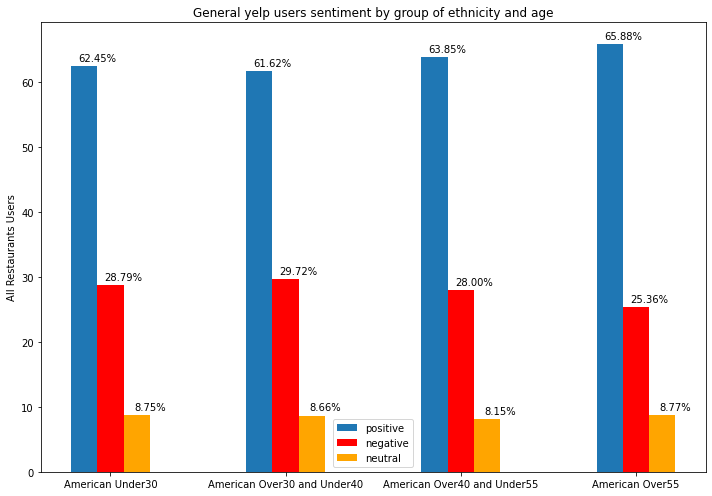

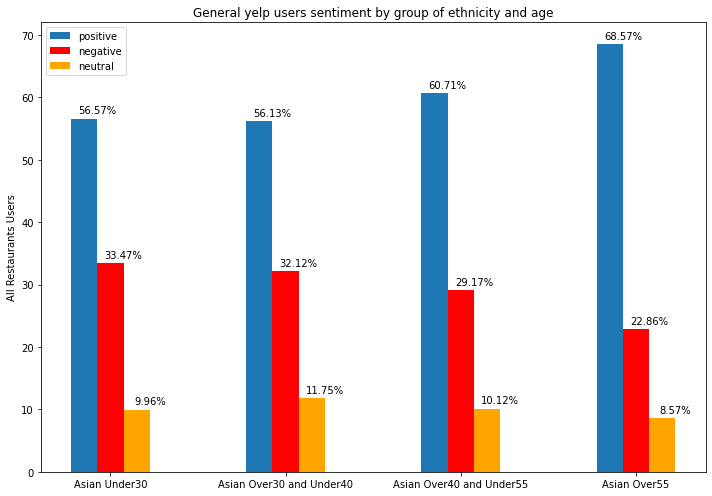

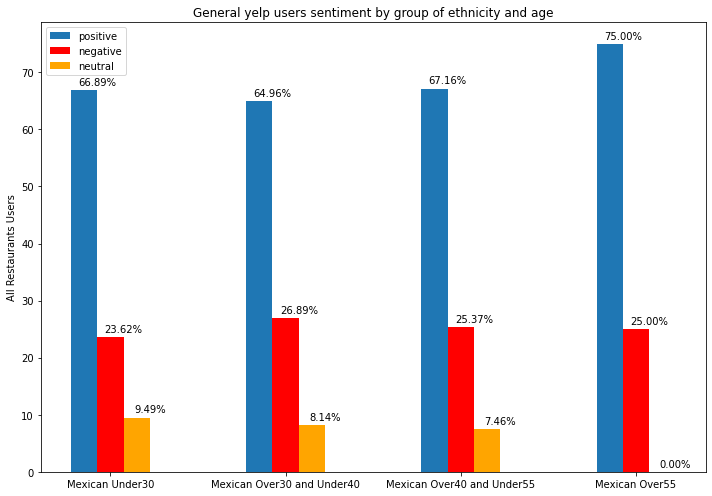

In [37]:
# Costruisco il grafico

american_labels = ['American Under30', 'American Over30 and Under40', 'American Over40 and Under55', 'American Over55']
asian_labels = ['Asian Under30', 'Asian Over30 and Under40', 'Asian Over40 and Under55', 'Asian Over55']
mexican_labels = ['Mexican Under30', 'Mexican Over30 and Under40', 'Mexican Over40 and Under55', 'Mexican Over55']

# GRAFICO PER TUTTI GLI UTENTI PER ETNIA E ETA'

# AMERICANI

# valori barre
positive = [american_under30_positive, american_over30_and_under40_positive, american_over40_and_under55_positive, american_over55_positive]
negative = [american_under30_negative, american_over30_and_under40_negative, american_over40_and_under55_negative, american_over55_negative]
neutral = [american_under30_neutral, american_over30_and_under40_neutral, american_over40_and_under55_neutral, american_over55_neutral]

x = np.arange(len(american_labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment by group of ethnicity and age')
ax.set_xticks(x)
ax.set_xticklabels(american_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# ASIATICI

positive = [asian_under30_positive, asian_over30_and_under40_positive, asian_over40_and_under55_positive, asian_over55_positive]
negative = [asian_under30_negative, asian_over30_and_under40_negative, asian_over40_and_under55_negative, asian_over55_negative]
neutral = [asian_under30_neutral, asian_over30_and_under40_neutral, asian_over40_and_under55_neutral, asian_over55_neutral]

x = np.arange(len(asian_labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment by group of ethnicity and age')
ax.set_xticks(x)
ax.set_xticklabels(asian_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# MESSICANI

positive = [mexican_under30_positive, mexican_over30_and_under40_positive, mexican_over40_and_under55_positive, mexican_over55_positive]
negative = [mexican_under30_negative, mexican_over30_and_under40_negative, mexican_over40_and_under55_negative, mexican_over55_negative]
neutral = [mexican_under30_neutral, mexican_over30_and_under40_neutral, mexican_over40_and_under55_neutral, mexican_over55_neutral]

x = np.arange(len(mexican_labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment by group of ethnicity and age')
ax.set_xticks(x)
ax.set_xticklabels(mexican_labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

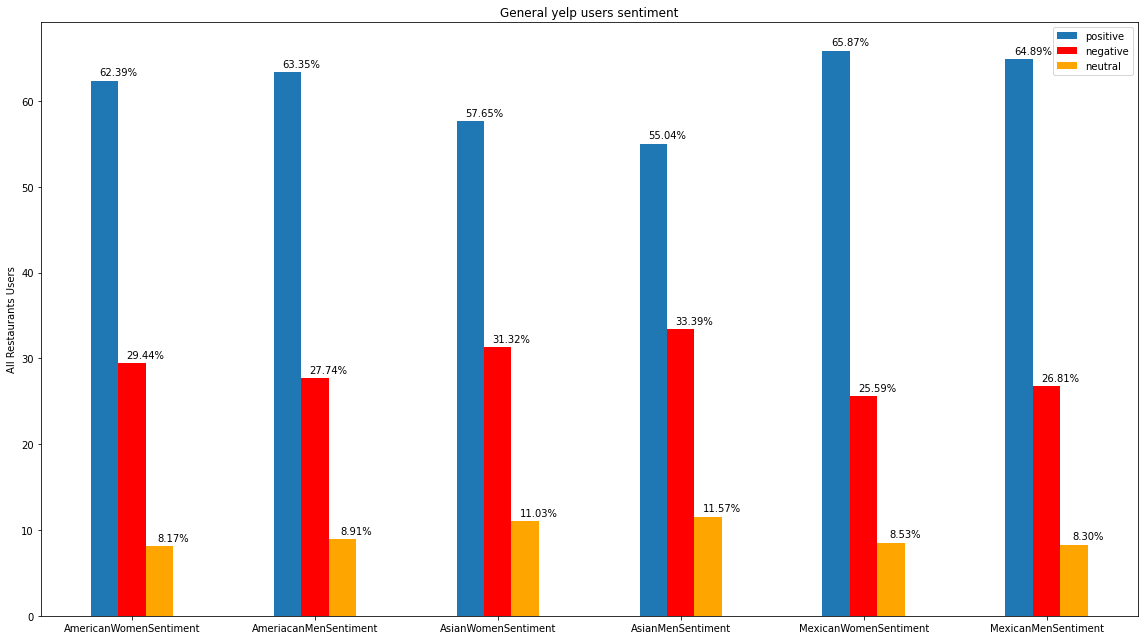

In [ ]:
# Costruisco il grafico

labels = ['AmericanWomenSentiment', 'AmeriacanMenSentiment', 'AsianWomenSentiment', 'AsianMenSentiment', 'MexicanWomenSentiment', 'MexicanMenSentiment']

# GRAFICO PER TUTTI GLI UTENTI PER ETNIA E GENERE

# valori barre
positive = [american_women_positive, american_men_positive, asian_women_positive, asian_men_positive, mexican_women_positive, mexican_men_positive]
negative = [american_women_negative, american_men_negative, asian_women_negative, asian_men_negative, mexican_women_negative, mexican_men_negative]
neutral = [american_women_neutral, american_men_neutral, asian_women_neutral, asian_men_neutral, mexican_women_neutral, mexican_men_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

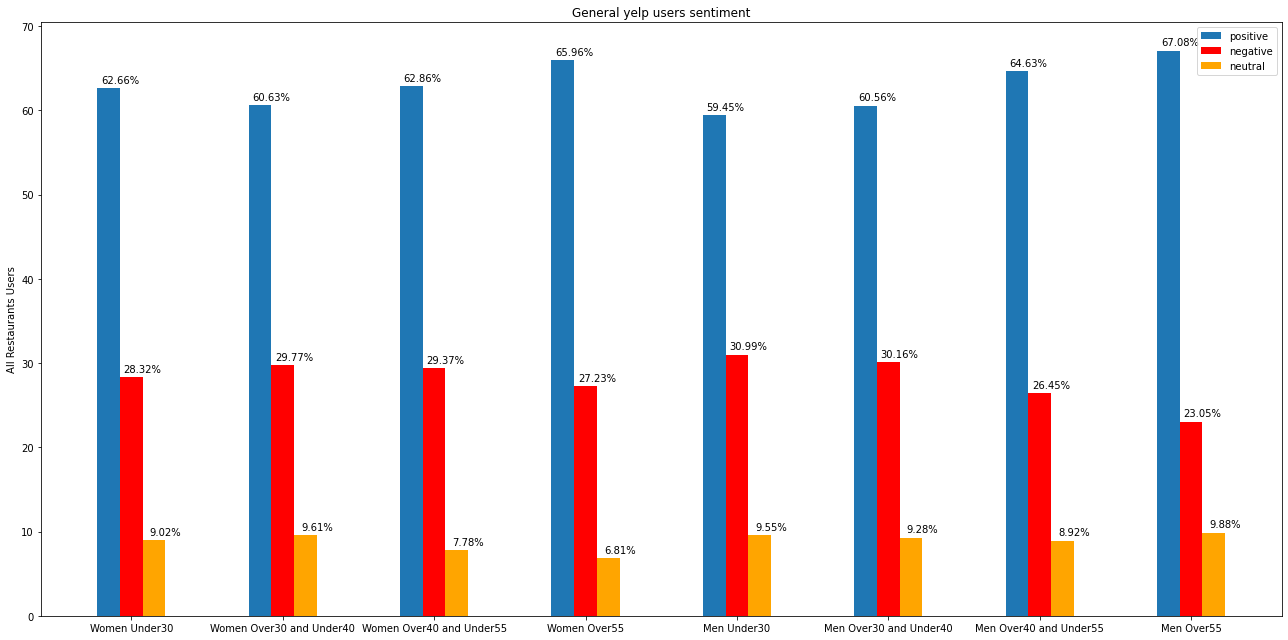

In [39]:
# Costruisco il grafico

labels = ['Women Under30', 'Women Over30 and Under40', 'Women Over40 and Under55', 'Women Over55',
          'Men Under30', 'Men Over30 and Under40', 'Men Over40 and Under55', 'Men Over55']

# GRAFICO PER TUTTI GLI UTENTI PER GENERE E ETA'

# valori barre
positive = [women_under30_positive, women_over30_and_under40_positive, women_over40_and_under55_positive, women_over55_positive,
            men_under30_positive, men_over30_and_under40_positive, men_over40_and_under55_positive, men_over55_positive]

negative = [women_under30_negative, women_over30_and_under40_negative, women_over40_and_under55_negative, women_over55_negative,
            men_under30_negative, men_over30_and_under40_negative, men_over40_and_under55_negative, men_over55_negative]

neutral = [women_under30_neutral, women_over30_and_under40_neutral, women_over40_and_under55_neutral, women_over55_neutral,
            men_under30_neutral, men_over30_and_under40_neutral, men_over40_and_under55_neutral, men_over55_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

matplotlib.rcParams['figure.figsize'] = (18.0, 9.0)
fig, ax = plt.subplots()

rects1 = ax.bar(x - width, positive, width, label='positive')
rects2 = ax.bar(x, negative, width, label='negative', color='red')
rects3 = ax.bar(x + width, neutral, width, label='neutral', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('All Restaurants Users')
ax.set_title('General yelp users sentiment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()